In [1]:
import pandas as pd
import numpy as np

In [2]:
import src

In [3]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks'

In [4]:
def load_pickle_preprocessed_data(path):
    """
    Load pickled data for modelling.
    
    Input
    =====
    path, str, to fodler where data is located.
    
    Output
    ======
    X_train,dataframe, 
    X_test,dataframe, 
    y_train,dataframe, 
    y_test, dataframe, 
    
    """
    #### load each data file
    X_train = pd.read_pickle(path + 'X_train.pkl')
    X_test = pd.read_pickle(path + 'X_test.pkl')
    y_train = pd.read_pickle(path + 'y_train.pkl')
    y_test = pd.read_pickle(path + 'y_test.pkl')
    
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = load_pickle_preprocessed_data('../data/processed/v1/')

In [5]:
X_train.shape

(1654, 52)

In [6]:
X_train.head(1)

,EDoccMAX_prevday,callender_DAY(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),EDmorn_STD(EDatt.flag_specreq),EDmorn_STD(EDatt.age),...,callender_MONTH(first_EDatt_time)_4,callender_MONTH(first_EDatt_time)_5,callender_MONTH(first_EDatt_time)_6,callender_MONTH(first_EDatt_time)_7,callender_MONTH(first_EDatt_time)_8,callender_MONTH(first_EDatt_time)_9,callender_MONTH(first_EDatt_time)_10,callender_MONTH(first_EDatt_time)_11,callender_MONTH(first_EDatt_time)_12,callender_WEEKEND(first_EDatt_time)
0,-0.452744,-1.552923,-1.520733,-2.575791,0.77684,0.788307,-1.017596,-1.371472,-0.44764,0.724071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Instantiate model

# Run CV gridsearch

In [7]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [8]:
from sklearn.svm import SVC

In [22]:
svm = SVC()

grid = {'kernel':['rbf','linear'], 'C':[0.1, 1, 10,100], 'gamma':['scale']}

grid_search = find_best_model(svm,grid,X_train,y_train,'CV set')
svm_clf = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetri

CV MODEL RESULTS
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
   mean_test_score  mean_train_score
5         0.442678          0.713229


In [25]:
pd.DataFrame(grid_search.cv_results_).query('param_kernel == "rbf"')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031514,0.019411,0.008975,0.002092,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.000000,0.000000,...,0.000000,0.000000,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.029921,0.021839,0.007776,0.003045,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.387097,0.271186,...,0.348976,0.056182,7,0.815789,0.650000,0.656250,0.656250,0.660317,0.687721,0.064119
4,0.046468,0.035511,0.010373,0.004574,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.373626,0.358974,...,0.421374,0.046154,3,1.000000,0.993789,0.992126,0.991045,0.990244,0.993441,0.003488
6,0.051064,0.037611,0.011371,0.004212,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.359551,0.384615,...,0.413396,0.036158,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [26]:
pd.DataFrame(grid_search.cv_results_).query('param_kernel == "linear"')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.021152,0.014422,0.004978,0.002272,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.435897,0.342857,...,0.406843,0.061915,5,0.800000,0.625000,0.564356,0.620438,0.597561,0.641471,0.082122
3,0.052244,0.038494,0.004803,0.001610,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.387755,0.383562,...,0.399922,0.065215,6,0.853659,0.696296,0.617647,0.620939,0.613095,0.680327,0.091951
5,0.436832,0.327801,0.005587,0.002411,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.409836,0.378378,...,0.442678,0.049208,1,0.904762,0.713287,0.660465,0.659722,0.627907,0.713229,0.099611
7,3.134808,2.266827,0.005188,0.001170,100,scale,linear,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}",0.397059,0.356164,...,0.439474,0.058026,2,0.953488,0.742857,0.650943,0.643836,0.618076,0.721840,0.123273


In [27]:
from src.eval.eval_utils import BinClassEval

# Warning not sure hsould be evaluating like this! should be using cv_prediction!

No handles with labels found to put in legend.


Model has decision_function.
AUC:  0.905
F1 score:  0.605
accuracy:  0.904


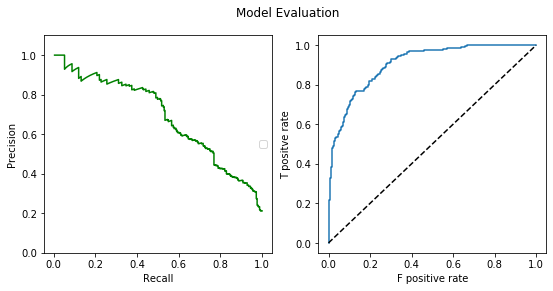

In [28]:
BinClassEval(svm_clf, X_train, y_train, plot=True)

In [29]:
from sklearn.feature_selection import SelectKBest

In [34]:
X = SelectKBest(k=30).fit_transform(X_train, y_train)

In [35]:
grid_search = find_best_model(svm,grid,X,y_train,'CV set')
svm_kbest = grid_search.best_estimator_

C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\class\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetri

CV MODEL RESULTS
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
   mean_test_score  mean_train_score
3         0.495198          0.616668


No handles with labels found to put in legend.


Model has decision_function.
AUC:  0.903
F1 score:  0.527
accuracy:  0.889


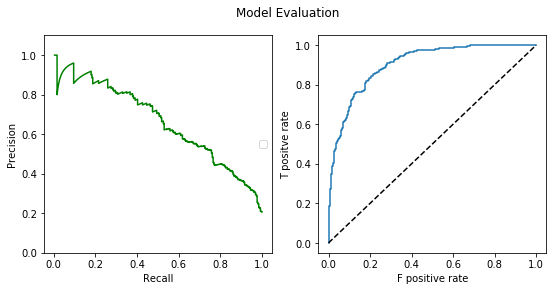

In [37]:
BinClassEval(svm_kbest, X, y_train, plot=True)

Reducing number of features help the SVM. I guess this is regularising it.

# Logging model and trianing results

Create first log df

model_log = pd.DataFrame(columns=['dataV','model','gridsearch','mean_train','mean_valid','notes'])

model_log

model_log.to_pickle('./../data/output/model_log.pkl')

In [32]:
from src.eval.eval_utils import save_model_to_log

In [34]:
save_model_to_log('./../data/output/model_log.pkl', 'v1', rf, grid_search, 'Random Forest 1st attempt with v1.')

Model logged.


In [35]:
pd.read_pickle('./../data/output/model_log.pkl')

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
1,v1,"(DecisionTreeClassifier(class_weight=None, cri...",mean_fit_time std_fit_time mean_score_ti...,[0.685],[0.419],Random Forest 1st attempt with v1.
